In [10]:
from Read.readfile.jsonLib import *
import json

import matplotlib.pyplot as plt

In [11]:
# Load JSON with utf-8

data = encoding_json_utf8("30DayQuakes.json")

In [12]:
# Load JSON with utf-8
data = encoding_json_utf8("30DayQuakes.json")

# Ingestion: focus on the 'features' list
features = data["features"]

# Flatten nested JSON into a DataFrame
df = pd.json_normalize(features)



# Explore
# Shows the first 5 entries, so you can see if data loads correctly you can do head(10) for 10 entries sample for random entries
df.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ci39107167,1.54,"6km E of Ocotillo Wells, CA",1584583306820,1584583533644,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",geoserve,nearby-cities,origin,phase-data,scit...",33.0,0.08636,0.22,52.0,ml,earthquake,"M 1.5 - 6km E of Ocotillo Wells, CA",Point,"[-116.0666656, 33.1399994, 9.45]"
1,Feature,ci39107159,1.76,"13km SW of Searles Valley, CA",1584582156320,1584582392529,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",geoserve,nearby-cities,origin,phase-data,scit...",20.0,0.08628,0.22,87.0,ml,earthquake,"M 1.8 - 13km SW of Searles Valley, CA",Point,"[-117.4846667, 35.671, 0.94]"
2,Feature,ci39107151,1.16,"24km NNW of Searles Valley, CA",1584581785410,1584582003488,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",geoserve,nearby-cities,origin,phase-data,scit...",13.0,0.06565,0.16,97.0,ml,earthquake,"M 1.2 - 24km NNW of Searles Valley, CA",Point,"[-117.5241667, 35.9545, 2.65]"
3,Feature,ci39107143,1.13,"23km NNW of Searles Valley, CA",1584581367120,1584581595628,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",geoserve,nearby-cities,origin,phase-data,scit...",11.0,0.07543,0.12,170.0,ml,earthquake,"M 1.1 - 23km NNW of Searles Valley, CA",Point,"[-117.5116667, 35.9545, 3.25]"
4,Feature,nc73355800,0.99,"8km NW of The Geysers, CA",1584580824600,1584583205549,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",geoserve,nearby-cities,origin,phase-data,scit...",25.0,0.01056,0.03,50.0,md,earthquake,"M 1.0 - 8km NW of The Geysers, CA",Point,"[-122.8184967, 38.831665, 1.63]"


In [13]:

# Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
print(df.info(True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11745 entries, 0 to 11744
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  11745 non-null  object 
 1   id                    11745 non-null  object 
 2   properties.mag        11743 non-null  float64
 3   properties.place      11745 non-null  object 
 4   properties.time       11745 non-null  int64  
 5   properties.updated    11745 non-null  int64  
 6   properties.tz         11745 non-null  int64  
 7   properties.url        11745 non-null  object 
 8   properties.detail     11745 non-null  object 
 9   properties.felt       664 non-null    float64
 10  properties.cdi        664 non-null    float64
 11  properties.mmi        111 non-null    float64
 12  properties.alert      45 non-null     object 
 13  properties.status     11745 non-null  object 
 14  properties.tsunami    11745 non-null  int64  
 15  properties.sig     

In [14]:
# Pretty-print first quake
print(json.dumps(features[0], indent=2, ensure_ascii=False))

{
  "type": "Feature",
  "properties": {
    "mag": 1.54,
    "place": "6km E of Ocotillo Wells, CA",
    "time": 1584583306820,
    "updated": 1584583533644,
    "tz": -480,
    "url": "https://earthquake.usgs.gov/earthquakes/eventpage/ci39107167",
    "detail": "https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ci39107167.geojson",
    "felt": null,
    "cdi": null,
    "mmi": null,
    "alert": null,
    "status": "automatic",
    "tsunami": 0,
    "sig": 36,
    "net": "ci",
    "code": "39107167",
    "ids": ",ci39107167,",
    "sources": ",ci,",
    "types": ",geoserve,nearby-cities,origin,phase-data,scitech-link,",
    "nst": 33,
    "dmin": 0.08636,
    "rms": 0.22,
    "gap": 52,
    "magType": "ml",
    "type": "earthquake",
    "title": "M 1.5 - 6km E of Ocotillo Wells, CA"
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -116.0666656,
      33.1399994,
      9.45
    ]
  },
  "id": "ci39107167"
}


In [15]:
# Cleaning
problems = {}

# DataFrame.isnull is an alias for DataFrame.isna. Detect missing values. Return a boolean 
# same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, 
# gets mapped to True values. Everything else gets mapped to False values. Characters such as 
# empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).
missing_data = df.isnull().sum()

has_missing = missing_data[missing_data > 0]

if len(has_missing) > 0:
    problems['missing'] = has_missing
else:
    print("Ingen manglende værdier fundet!")

# Create a copy of the DataFrame with lists converted to strings
df_for_duplicates = df.copy()
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        df_for_duplicates[col] = df[col].astype(str)

# Check for duplicates
duplicates = df_for_duplicates.duplicated().sum()

if duplicates > 0:
        problems['duplicates'] = duplicates
else:
        print("no duplicates")

# Check for unrealistic values
if 'properties.mag' in df.columns:
    mag_col = 'properties.mag'
    mag_data = df[mag_col].dropna()
        
    # Check for unrealistic values
    unrealistic_high = (mag_data > 10).sum()
    unrealistic_low = (mag_data < -3).sum()

    if unrealistic_high > 0 or unrealistic_low > 0:
         problems['magnitude_outliers'] = {'high': unrealistic_high, 'low': unrealistic_low}
    else:
        print("Magnitude værdier ser normale ud")
        
features_cleaned = df.dropna()

print(features_cleaned)            

no duplicates
Magnitude værdier ser normale ud
          type            id  properties.mag  \
45     Feature    nc73355700            5.21   
93     Feature    uu60364832            4.58   
208    Feature    uu60363822            4.46   
235    Feature    uu60363602            5.70   
1851   Feature    nn00718984            4.00   
2805   Feature    nc73352615            3.71   
3099   Feature  pr2020070010            3.61   
3477   Feature    nc73351825            4.94   
3552   Feature    nc73351710            5.77   
4366   Feature    ci38385946            5.49   
4386   Feature  pr2020067000            3.90   
5713   Feature    nc73349375            3.99   
7298   Feature  pr2020059049            3.80   
9838   Feature    nc73344735            4.33   
10899  Feature  pr2020051004            3.60   

                             properties.place  properties.time  \
45                     15km W of Petrolia, CA    1584569300920   
93                      5km NE of Magna, Utah    158

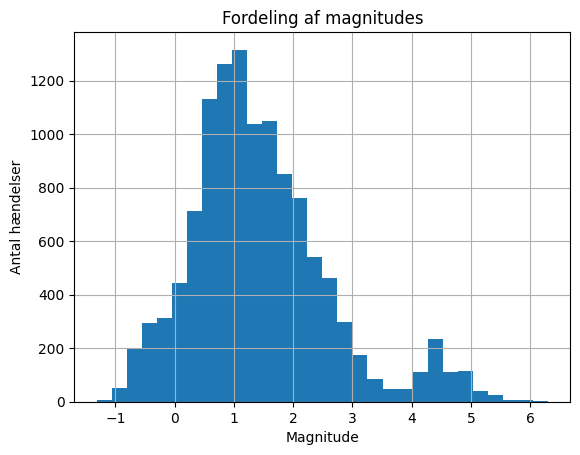

In [17]:
df['properties.mag'].hist(bins=30)
plt.title("Fordeling af magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Antal hændelser")
plt.show()

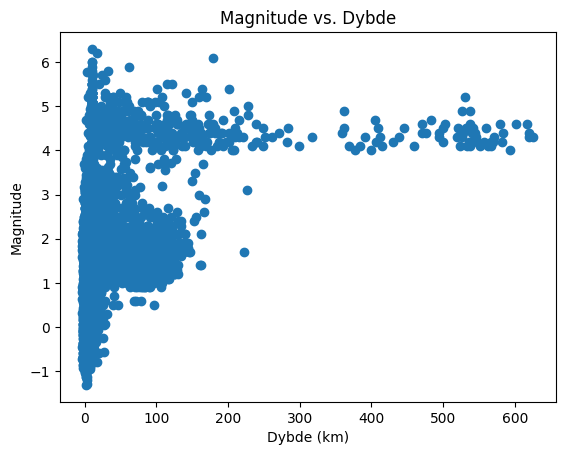

In [18]:
plt.scatter(df['geometry.coordinates'].str[2], df['properties.mag'])
plt.xlabel("Dybde (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Dybde")
plt.show()

In [19]:
features_cleaned.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
45,Feature,nc73355700,5.21,"15km W of Petrolia, CA",1584569300920,1584583353875,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1761.0,...,",dyfi,geoserve,ground-failure,impact-link,loss...",34.0,0.10500,0.1600,248.00,mw,earthquake,"M 5.2 - 15km W of Petrolia, CA",Point,"[-124.4561667, 40.3475, 28.61]"
93,Feature,uu60364832,4.58,"5km NE of Magna, Utah",1584558743610,1584583479933,-420,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,3517.0,...,",dyfi,geoserve,losspager,moment-tensor,origin,...",39.0,0.02976,0.2100,47.00,ml,earthquake,"M 4.6 - 5km NE of Magna, Utah",Point,"[-112.059, 40.751, 10.65]"
208,Feature,uu60363822,4.46,"7km NNE of Magna, Utah",1584540132800,1584583300130,-420,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1241.0,...,",dyfi,geoserve,losspager,moment-tensor,origin,...",22.0,0.03608,0.2400,87.00,ml,earthquake,"M 4.5 - 7km NNE of Magna, Utah",Point,"[-112.0725, 40.7651667, 8.99]"
235,Feature,uu60363602,5.70,"6km NNE of Magna, Utah",1584536971530,1584583265183,-420,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,33091.0,...,",dyfi,general-text,geoserve,ground-failure,los...",54.0,0.04022,0.2000,50.00,mw,earthquake,"M 5.7 - 6km NNE of Magna, Utah",Point,"[-112.0783333, 40.751, 11.9]"
1851,Feature,nn00718984,4.00,"50km WSW of Goldfield, Nevada",1584139049787,1584572054624,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,9.0,...,",dyfi,focal-mechanism,geoserve,losspager,momen...",16.0,0.25200,0.1742,34.16,ml,earthquake,"M 4.0 - 50km WSW of Goldfield, Nevada",Point,"[-117.7428, 37.5417, 5.8]"
